# Mudanças Climáticas

Nesse problemas vamos estudar a relação entre algumas variáveis e a temperatura. O arquivo [climate_change.csv](https://raw.githubusercontent.com/abnr/ml-data/main/climate_change.csv) tem dados climáticos de Maio de 1983 até Dezembro de 2008, com a variáveis:

* Year: o ano da observação.
* Month: o mês da observação.
* Temperature: a diferença em graus Celsius entre a média global de temperatura naquele período e um valor de referência. Dado proveniente da [Climatic Research Unit at the University of East Anglia](https://sites.uea.ac.uk/cru/).
* CO2, N2O, CH4, CFC.11, CFC.12: concentração atmosférica de dióxido de carbono (CO2), óxido nitroso (N2O), metano (CH4), triclorofluormetano (CCl3F, conhecido como CFC-11) e diclorofluormetano (CCl2F2, conhecido como CFC-12). Esses dados foram coletados da  [ESRL/NOAA Global Monitoring Division](http://www.esrl.noaa.gov/gmd/ccgg/data-products.html).
* Aerosols:  a media da profundidade óptica do aerosol estratosférico à 500 nm. Essa variável é ligada com a atividade vulcânica, já que essa atividade lança partículas na atmosfera que afetam o quanto da energia do sol é refletida novamente para o espaço. Esse dado é do [Godard Institute for Space Studies at NASA](http://data.giss.nasa.gov/modelforce/strataer/).
* TSI: o total da irradiãncia solar em W/m2 (a quantidade de energia solar depositada por unidade de área). Devido a manchas solares e outros fenômenos solares, essa quantidade de energia pode variar com o tempo. Dado proveniente do [SOLARIS-HEPPA](http://solarisheppa.geomar.de/solarisheppa/cmip5).
* MEI: multivariate El Nino Southern Oscillation index (MEI), uma medida de força do El Nino/La Nina. Dado do [ESRL/NOAA Physical Sciences Division](https://www.esrl.noaa.gov/psd/).



In [42]:
#Libraries import
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

## Problema 1

Nos estamos interessados em saber como alterações nessas variáveis afetam as temperaturas futuras e como essas variáveis explicam as mudanças na temperatura. Para fazer isso, leia o dataset, divida em um dataset para treino usando dados até 2006 (incluso). O dataset de treino é aquele que vai ser usado para encontrar os parâmetros do modelo. 

Crie um modelo de regressão para prever Temp usando MEI, CO2, CH4, N2), CFC.11, CFC.12, TSI e Aerosol (Não use ano e mês).

Qual o valor de $R^2$ que você encontrou?

In [19]:
#Data Read
df_climate_change = pd.read_csv('climate_change.csv')
df_climate_change

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [20]:
df_climate_change.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [21]:
df_climate_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [22]:
print(df_climate_change.isna().sum()) 

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64


In [23]:
#df_climate_change_train =
df_climate_change_train = df_climate_change[df_climate_change['Year'] < 2007]
df_climate_change_train.sample()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
21,1985,2,-0.602,346.06,1666.21,305.243,209.543,374.681,1365.7085,0.016,-0.155


In [24]:
X = df_climate_change_train[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
Y = df_climate_change_train[['Temp']]
X = sm.add_constant(X)
modelo_linear_climate_change  = sm.OLS(Y, X)
modelo_linear_climate_change = modelo_linear_climate_change.fit()
print(modelo_linear_climate_change.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     103.6
Date:                Fri, 28 May 2021   Prob (F-statistic):           1.94e-78
Time:                        23:23:59   Log-Likelihood:                 280.10
No. Observations:                 284   AIC:                            -542.2
Df Residuals:                     275   BIC:                            -509.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.5943     19.887     -6.265      0.0

Qual o valor de  𝑅²  que você encontrou?

R-squared = 0.751

Isso indica que uma grande proporção da variância da variável resposta é explicada pela regressão

## Problema 2

Quais variáveis foram significativas?

As variáveis significativas são aquelas que tem P-Valor próximos de 0.
MEI, CO2, CFC-11, CFC-12, TSI e Aerosols

## Problema 3

A opinião científica atual é que N20 e CFC-11 são gases de efeito estufa. Entretanto os coeficientes dessas variáveis na regressão deram negativos, indicando que o aumento da concentração desses gases estariam associadas com baixas temperaturas. 

Qual a explicação para essa contradição?

## Problema 4

Calcule a correlação entre todas as variáveis do conjunto de treinamento. 

1. Quais outras variáveis são muito correlacionadas com N2O (correlação > 0.7) ? 
2. Quais outras variáveis são muito correlacionadas com CFC.11 ?

In [25]:
import matplotlib.pyplot as plt

corr = df_climate_change_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.027942,-0.036988,0.982749,0.915659,0.993845,0.569106,0.897012,0.170302,-0.345247,0.786797
Month,-0.027942,1.000000,0.000885,-0.106732,0.018569,0.013632,-0.013111,0.000675,-0.034606,0.014890,-0.099857
MEI,-0.036988,0.000885,1.000000,-0.041147,-0.033419,-0.050820,0.069000,0.008286,-0.154492,0.340238,0.172471
CO2,0.982749,-0.106732,-0.041147,1.000000,0.877280,0.976720,0.514060,0.852690,0.177429,-0.356155,0.788529
CH4,0.915659,0.018569,-0.033419,0.877280,1.000000,0.899839,0.779904,0.963616,0.245528,-0.267809,0.703255
N2O,0.993845,0.013632,-0.050820,0.976720,0.899839,1.000000,0.522477,0.867931,0.199757,-0.337055,0.778639
CFC-11,0.569106,-0.013111,0.069000,0.514060,0.779904,0.522477,1.000000,0.868985,0.272046,-0.043921,0.407710
CFC-12,0.897012,0.000675,0.008286,0.852690,0.963616,0.867931,0.868985,1.000000,0.255303,-0.225131,0.687558
TSI,0.170302,-0.034606,-0.154492,0.177429,0.245528,0.199757,0.272046,0.255303,1.000000,0.052117,0.243383
Aerosols,-0.345247,0.014890,0.340238,-0.356155,-0.267809,-0.337055,-0.043921,-0.225131,0.052117,1.000000,-0.384914


1. Quais outras variáveis são muito correlacionadas com N2O (correlação > 0.7): Year, CO2, CH4, CFC-12 e Temp
2. Quais outras variáveis são muito correlacionadas com CFC.11: CH4 e CFC-12

## Problema 5

Vamos simplificar o modelo e remover as variáveis muito correlacionadas. Crie um modelo com MEI, TSI, Aerosols e N2O. 

1. Qual o coeficiente do N2O nesse novo modelo?
2. Qual o valor do $R^2$ ?

In [9]:
X = df_climate_change_train[['MEI', 'TSI', 'Aerosols', 'N2O']]
Y = df_climate_change_train[['Temp']]
X = sm.add_constant(X)
modelo_linear_climate_change_uncorrelated  = sm.OLS(Y, X)
modelo_linear_climate_change_uncorrelated = modelo_linear_climate_change_uncorrelated.fit()
print(modelo_linear_climate_change_uncorrelated.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     184.9
Date:                Fri, 28 May 2021   Prob (F-statistic):           3.52e-77
Time:                        23:17:58   Log-Likelihood:                 266.64
No. Observations:                 284   AIC:                            -523.3
Df Residuals:                     279   BIC:                            -505.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -116.2269     20.223     -5.747      0.0

Qual o coeficiente do N2O nesse novo modelo?
R: 0.0253
Qual o valor do  𝑅2  ?
R: 0.726
Isso indica que a regressão explica uma grande proporção da variância da variável resposta, mas ainda menor do que no modelo anteior com as variáveis correlacionadas.

# Dados do PISA

O Programme for International Student Assessment (PISA) é um teste feito no mundo todo a cada 3 anos para estudantes de 15 anos para avaliar a performance em matemática, leitura e ciências. A ideia do teste é fornecer uma maneira de comparar estudantes de diferentes partes do mundo. O objetivo dessa questão é prever as notas de leitura dos estudantes dos Estados Unidos para o PISA de 2009.

O dataset [pisa2009train.csv](https://raw.githubusercontent.com/abnr/ml-data/main/pisa2009train.csv) e [pisa2009test.csv](https://raw.githubusercontent.com/abnr/ml-data/main/pisa2009test.csv) contem informação sobre demografia e escolas dos estudantes norte-americanos que fazem os exame, extraidos do dataset 2009 Pisa Public-Use Data Files distribuido pela United States National Center for Education Statistics (NCES). Esse dataset não possui informações que tornem possível a identificação dos estudantes.
 
Cada linha do dataset pisa2009train.csv e pisa2009test.csv representa um estudante que fez a prova. Os datasets possuem as seguintes variáveis:

* grade: A série do aluno na escola (a maior parte dos alunos está na 10ª) 

* male: Se o estudante é do sexo masculino (1/0)

* raceeth: A raça/etnia do estudante.

* preschool: Se o estudante cursou a pré-escola (1/0)

* expectBachelors: Se o estudante espera fazer graduação superior (1/0)

* motherHS: Se a mãe do estudante completou o ensino médio (1/0) 

* motherBachelors: Se a mãe do estudante completou a graduação superior (1/0)

* motherWork: Se a mãe do estudante possui um emprego  (1/0)

* fatherHS: Se o pai do estudante completou o ensino médio  (1/0)

* fatherBachelors: Se o pai do estudante obteve graduação superior (1/0)

* fatherWork: Se o pai do estudante possui um emprego (1/0)

* selfBornUS: Se o estudante nasceu nos Estados Unidos (1/0)

* motherBornUS: Se a mãe do estudante nasceu nos Estados Unidos (1/0)

* fatherBornUS: Se o pai do estudante nasceu nos Estados Unidos (1/0)

* englishAtHome: Se o estudante fala inglês em casa (1/0)

* computerForSchoolwork: Se o estudante tem acesso a um computador para tarefas da escola (1/0)

* read30MinsADay: Se o estudante lê por prazer 30 minutos/dia (1/0)

* minutesPerWeekEnglish: Número de minutos que o estudante passa por semana em aulas de inglês

* studentsInEnglish: Número de estudantes na sala de inglês da escola. 

* schoolHasLibrary: Se a escola do estudante possui uma biblioteca.  (1/0)

* publicSchool: Se o estudante estuda em uma escola pública  (1/0)

* urban: Se o estudante estuda em uma escola em uma área urbana  (1/0)

* schoolSize: O número de estudante na escola 

* readingScore: A nota do estudante em leitura em uma escala de 1000 pontos. 

In [10]:
#Leitura dos Dados de treino

df_pisa2009_train = pd.read_csv('pisa2009train.csv')
df_pisa2009_train.sample()
print(f'Dimensão Dataset de treino', df_pisa2009_train.shape)
df_pisa2009_train.isna().sum()

Dimensão Dataset de treino (3663, 24)


grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

In [11]:
#Leitura dos Dados de teste

df_pisa2009_test = pd.read_csv('pisa2009test.csv')
df_pisa2009_test.sample()
print(f'Dimensão Dataset de teste', df_pisa2009_test.shape)
df_pisa2009_test.isna().sum()

Dimensão Dataset de teste (1570, 24)


grade                      0
male                       0
raceeth                   13
preschool                 21
expectBachelors           23
motherHS                  45
motherBachelors          188
motherWork                36
fatherHS                 125
fatherBachelors          288
fatherWork               113
selfBornUS                24
motherBornUS              23
fatherBornUS              58
englishAtHome             27
computerForSchoolwork     30
read30MinsADay            21
minutesPerWeekEnglish    103
studentsInEnglish        114
schoolHasLibrary          58
publicSchool               0
urban                      0
schoolSize                69
readingScore               0
dtype: int64

## Problema 1: Perguntas sobre o dataset:

1. Quantos alunos tem no dataset?
2. Qual a média da nota de leitura dos estudantes com valor de $male == 1$ e $male == 0$ ?
3. Quais variáveis possuem valores faltantes?
4. Escolha e explique uma estratégia para lidar com os valroes faltantes.
5. Quais variáveis são nominais com pelo menos 3 possívels valores? Quais variáveis são ordinais com pelo menos 3 possívels valores?


1. Quantos alunos tem no dataset?

O dataset de treino possui 3663 estudantes, enquanto que no de treino este número é de 1570, totalizando 5233 resgistros de alunos.

2. Qual a média da nota de leitura dos estudantes com valor de  𝑚𝑎𝑙𝑒==1  e  𝑚𝑎𝑙𝑒==0  ?

In [12]:
df_pisa2009 = pd.concat([df_pisa2009_train, df_pisa2009_test])
df_pisa2009.shape

(5233, 24)

In [13]:
media_readingScore_male_1 = df_pisa2009[df_pisa2009['male'] == 1]['readingScore'].mean()
media_readingScore_male_0 = df_pisa2009[df_pisa2009['male'] == 0]['readingScore'].mean()

print(f"A média da nota de leitura para alunos do sexo masculino é: ", media_readingScore_male_1)
print(f"A média da nota de leitura para alunos do sexo feminino é: ", media_readingScore_male_0)

A média da nota de leitura para alunos do sexo masculino é:  484.0717193896527
A média da nota de leitura para alunos do sexo feminino é:  511.8607894736839


3. Quais variáveis possuem valores faltantes?

As únicas variáveis que não possuem valores faltantes são: 

grade, male, publicSchool, As únicas variáveis que não possuem valores faltantes são: grade, male, publicSchool,  urban e readingScore

In [14]:
df_pisa2009.isna().sum()

grade                      0
male                       0
raceeth                   48
preschool                 77
expectBachelors           85
motherHS                 142
motherBachelors          585
motherWork               129
fatherHS                 370
fatherBachelors          857
fatherWork               346
selfBornUS                93
motherBornUS              94
fatherBornUS             171
englishAtHome             98
computerForSchoolwork     95
read30MinsADay            55
minutesPerWeekEnglish    289
studentsInEnglish        363
schoolHasLibrary         201
publicSchool               0
urban                      0
schoolSize               231
readingScore               0
dtype: int64

4. Escolha e explique uma estratégia para lidar com os valroes faltantes.

Analisando o percentual de dados faltantes para cada variável

In [15]:
df_pisa2009.isna().sum()/df_pisa2009.shape[0]*100

grade                     0.000000
male                      0.000000
raceeth                   0.917256
preschool                 1.471431
expectBachelors           1.624307
motherHS                  2.713549
motherBachelors          11.179056
motherWork                2.465125
fatherHS                  7.070514
fatherBachelors          16.376839
fatherWork                6.611886
selfBornUS                1.777183
motherBornUS              1.796293
fatherBornUS              3.267724
englishAtHome             1.872731
computerForSchoolwork     1.815402
read30MinsADay            1.051022
minutesPerWeekEnglish     5.522645
studentsInEnglish         6.936748
schoolHasLibrary          3.841009
publicSchool              0.000000
urban                     0.000000
schoolSize                4.414294
readingScore              0.000000
dtype: float64

Analisando a correlatividade das variáveis

In [31]:
df_pisa2009[df_pisa2009['fatherBachelors'] == 1]['readingScore'].mean()

540.0014058171754

In [32]:
df_pisa2009[df_pisa2009['fatherBachelors'] == 0]['readingScore'].mean()

487.80521828103593

In [26]:
corr = df_pisa2009.corr()
corr.style.background_gradient(cmap='coolwarm')

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.089213,-0.011200,0.148041,0.028976,0.043972,0.042522,0.068751,0.056805,0.010012,-0.015076,-0.062865,-0.057618,-0.009583,0.105568,0.065484,0.045747,0.074487,-0.016703,-0.059306,0.080561,0.063289,0.272413
male,-0.089213,1.000000,0.005507,-0.088671,0.031166,0.048206,-0.016717,0.016752,0.057838,0.030472,0.013215,0.002977,0.012652,-0.005748,-0.028993,-0.214101,0.009808,-0.036348,0.022453,-0.075265,0.016113,-0.004586,-0.145303
preschool,-0.011200,0.005507,1.000000,0.095978,0.140893,0.154680,0.069062,0.137600,0.146597,0.054756,0.093149,0.110534,0.113289,0.122812,0.094145,-0.003884,-0.012829,-0.030150,0.029039,-0.076767,-0.056366,-0.024381,0.060373
expectBachelors,0.148041,-0.088671,0.095978,1.000000,0.109735,0.174178,0.070219,0.151738,0.208115,0.023476,-0.002508,0.009766,0.009201,0.035530,0.132233,0.125497,0.008403,0.041987,0.055405,-0.113289,0.006144,0.021538,0.359425
motherHS,0.028976,0.031166,0.140893,0.109735,1.000000,0.252665,0.170211,0.509090,0.229883,0.036855,0.176047,0.344936,0.337395,0.376071,0.182245,0.020236,0.031403,-0.042705,0.021296,-0.074333,-0.116650,-0.089987,0.161376
motherBachelors,0.043972,0.048206,0.154680,0.174178,0.252665,1.000000,0.133704,0.210307,0.539321,0.067062,0.028062,0.140357,0.119619,0.160095,0.144212,0.033012,0.017249,-0.043409,0.022864,-0.172575,-0.040708,-0.007501,0.213743
motherWork,0.042522,-0.016717,0.069062,0.070219,0.170211,0.133704,1.000000,0.115492,0.046268,0.054015,0.067138,0.102452,0.094600,0.121524,0.091743,-0.027740,0.022426,-0.011111,-0.007515,-0.025414,-0.027873,-0.047528,0.047248
fatherHS,0.068751,0.016752,0.137600,0.151738,0.509090,0.210307,0.115492,1.000000,0.281755,0.107036,0.150403,0.298765,0.320266,0.336876,0.170892,0.046933,0.036223,-0.020973,0.036179,-0.086946,-0.100400,-0.083902,0.188446
fatherBachelors,0.056805,0.057838,0.146597,0.208115,0.229883,0.539321,0.046268,0.281755,1.000000,0.108559,-0.008772,0.068955,0.072586,0.125238,0.172355,0.057101,0.008416,-0.031457,0.006428,-0.188413,-0.007594,0.031286,0.260840
fatherWork,0.010012,0.030472,0.054756,0.023476,0.036855,0.067062,0.054015,0.107036,0.108559,1.000000,-0.024228,-0.004170,-0.007727,0.013639,0.083243,-0.012241,0.023599,0.003508,-0.003134,-0.020203,-0.029030,-0.022164,0.067909


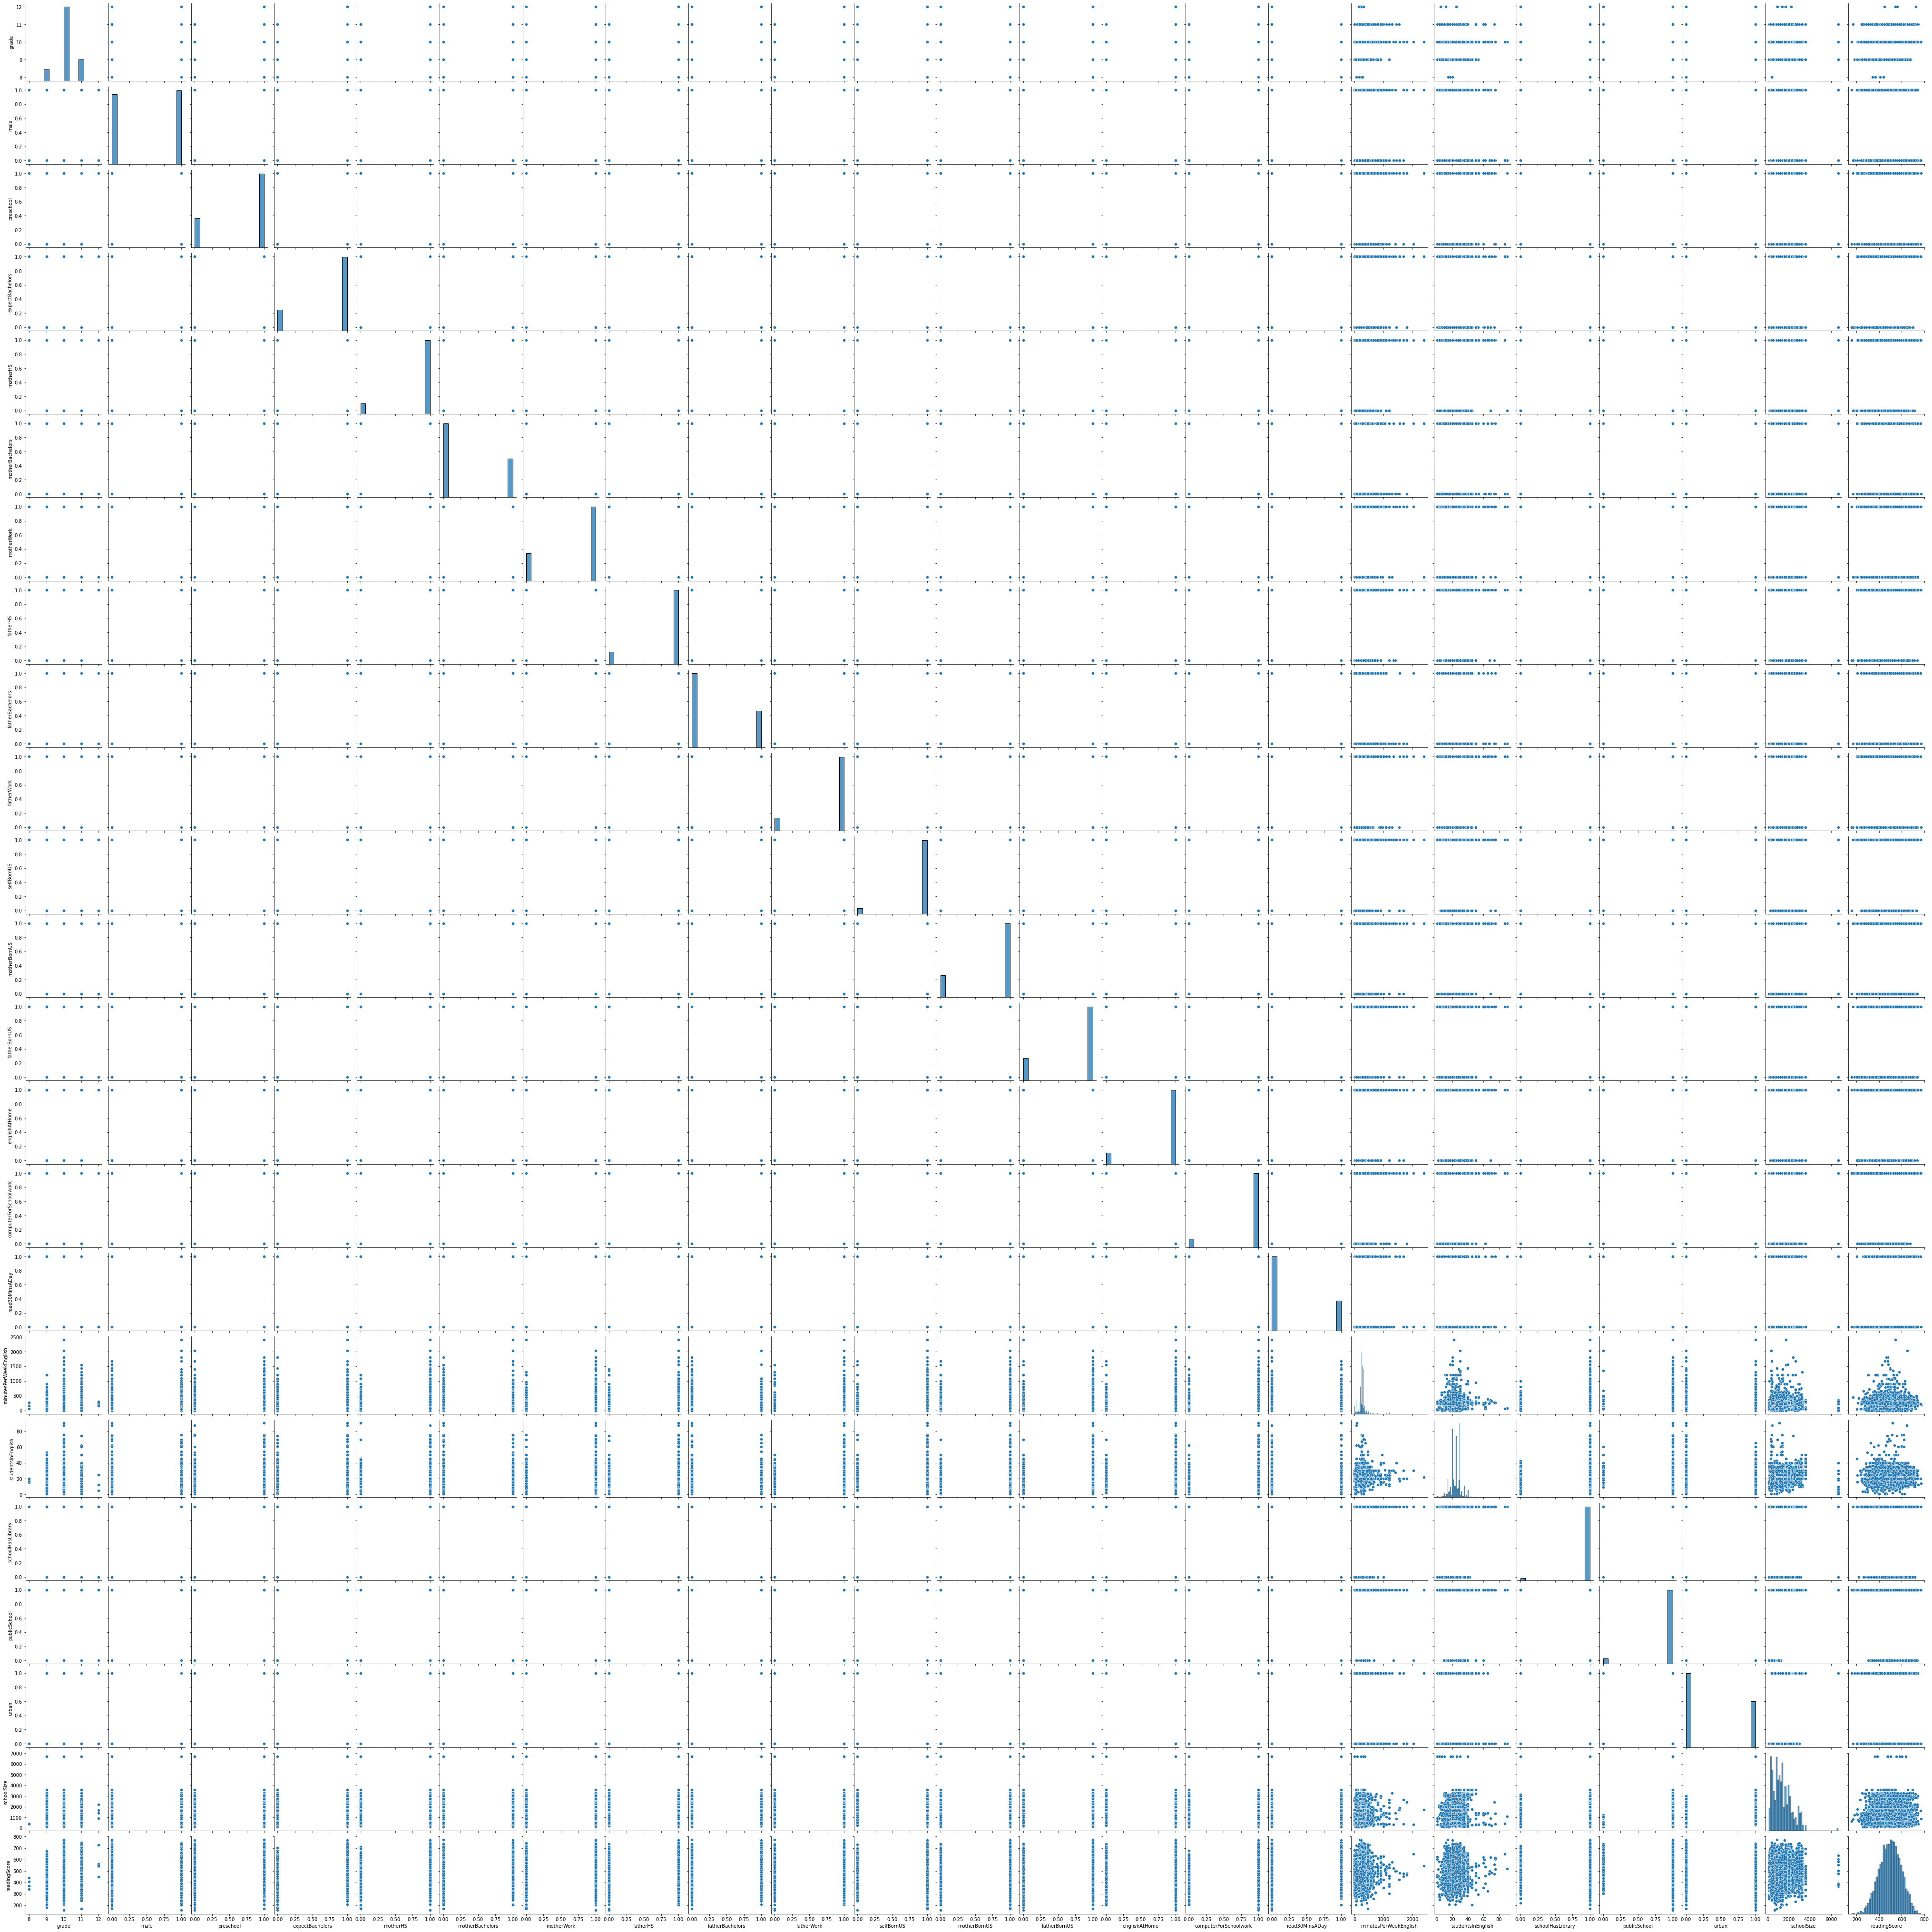

In [27]:

sns.pairplot(df_pisa2009);

5. Quais variáveis são nominais com pelo menos 3 possívels valores? Quais variáveis são ordinais com pelo menos 3 possívels valores?

In [34]:
df_pisa2009.dtypes

grade                      int64
male                       int64
raceeth                   object
preschool                float64
expectBachelors          float64
motherHS                 float64
motherBachelors          float64
motherWork               float64
fatherHS                 float64
fatherBachelors          float64
fatherWork               float64
selfBornUS               float64
motherBornUS             float64
fatherBornUS             float64
englishAtHome            float64
computerForSchoolwork    float64
read30MinsADay           float64
minutesPerWeekEnglish    float64
studentsInEnglish        float64
schoolHasLibrary         float64
publicSchool               int64
urban                      int64
schoolSize               float64
readingScore             float64
dtype: object

Apenas a variável raceeth é qualitativa.

In [36]:
df_pisa2009['raceeth'].value_counts()

White                                     2894
Hispanic                                  1184
Black                                      635
Asian                                      204
More than one race                         177
American Indian/Alaska Native               51
Native Hawaiian/Other Pacific Islander      40
Name: raceeth, dtype: int64

## Problema 2

Crie um modelo de regressão com dados de treino e teste com o de testes. Use variáveis dummies para as variáveis categóricas. Qual o valor do $R^2$ e erro médio quadrático para o conjunto de treinamento ?

Criando variáveis dummies:

In [39]:
df_pisa2009_train = pd.get_dummies(df_pisa2009_train)
df_pisa2009_test = pd.get_dummies(df_pisa2009_test)

In [43]:
df_pisa2009_train.head()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,11,1,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00,0,0,0,0,0,0,0
1,11,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01,0,0,0,0,0,0,1
2,9,1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81,0,0,0,0,0,0,1
3,10,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11,0,0,1,0,0,0,0
4,10,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89,0,0,0,1,0,0,0


In [44]:
df_pisa2009_test.head()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,selfBornUS,motherBornUS,fatherBornUS,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,10,0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24,0,0,0,0,0,0,1
1,10,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57,0,0,0,0,0,0,1
2,10,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62,0,0,0,0,0,0,1
3,10,0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24,0,0,0,0,0,0,1
4,10,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50,0,0,0,0,0,0,1


In [48]:
XP = df_pisa2009_train.drop(columns=['readingScore'])
YP = df_pisa2009_train['readingScore']
XP = sm.add_constant(XP)
modelo_linear_df_pisa2009  = sm.OLS(YP, XP)
modelo_linear_df_pisa2009 = modelo_linear_df_pisa2009.fit()
print(modelo_linear_df_pisa2009.summary())

MissingDataError: exog contains inf or nans

## Problema 3

Considere dois estudantes A e B. Eles possuem todos os valores iguais exceto que o estudante A é da série 11 e o estudante B é da sala 9. Qual é a nota prevista para o estudante A menos a nota prevista para o estudante B ?

## Problema 4

Quais variáveis você considera que são candidatas para remoção do modelo?

## Problema 5

Use o dataset de treino para estimar as notas de alunos que não foram usados no treinamento. Qual o $R^2$ e RMSE para esse conjunto?

# Dados do Google Flu

A epidemia de gripe é um grande problema de saúde pública que causa um grande número de hospitalizações e mortes. De acordo com o National Vital Statistics Reports, publicado em outubro de 2012, influenza é a oitava causa de mortes em 2011 nos Estados Unidos. Para o mundo todo, a cada ano, morrem de 250000 à 500000 pessoas por ano de influenza.

O Centro de Controle de Doenças (CDC) e o 
European Influenza Surveillance Scheme (EISS) detectam influenza através de dados clínicos, entretanto essas informações são publicadas com atraso de 1-2 semanas.

O Google Flu Trends é um projeto que foi criado para testar se é possível identificar a quantidade de casos de gripe baseado na quantidade de buscas sobre o assunto, já que esse dado pode ser recuperado imediatamente.

Nosso objetivo é estimar o número de doenças similares a influenza (influenza-like illness ILI) usando a informação das buscas do Google. 

Uma das fontes de dados, o Google Search Queries - Google Trends fornece a contagem semanal de buscas dos usuários do google ao redor do mundo. Para cada local, a contagem é normalizada dividindo a contadem de cada busca na semana pelo número total de buscas. Dessa forma os valores estão entre 0 e 1.
 
 O arquivo csv [FluTrain](https://raw.githubusercontent.com/abnr/ml-data/main/FluTrain.csv) agrega os dois dados de Janeiro de 2004 até Dezembro de 2011, com as colunas:

"Week" - A faixa de datas a qual a observação foi feita, no formato ano/mes/dia.

"ILI" - A porcentagem de casos de ILI reportados na semana.

"Queries" - A fração das buscas de ILI naquela semana.






## Problema 1

Verifique se ILI segue uma distribuição normal. Caso não seja normal, utilize alguma estratégia para transformar esses dados.



## Problema 2

Ajuste um modelo de regressão linear e calcule o $R^2$.



## Problema 3

O arquivo [FluTest.csv](https://raw.githubusercontent.com/abnr/ml-data/main/FluTest.csv) contem os dados de 2012, utilize esses dados para teste. Calcule as métricas de erro para esse dataset e faça a análise residual.




## Problema 4

Crie uma nova variável usando a coluna ILI com lag de 2. Utilize essa variável, além das buscas do google como entrada. Treine o modelo de regressão, refaça análise residual e verifique quais variáveis foram significativas. Compare as métricas de erro do dataset de teste desse modelo com o modelo anterior.

# Baseball

Vamos usar o [dataset de baseball](https://raw.githubusercontent.com/abnr/ml-data/main/baseball.csv) para tentar prever quem vai ser o campeão da temporada. Esse dataset é composto pelas variáveis:

* Team: O código para o nome do time.
* League: A liga que o time pertence, pode ser AL ou NL
* Year: Ano do registro
* RS: o número de runs do time no ano.
* RA: O número de runs permitidos pelo time no ano.
* W: O número de vitórias na temporada 
* OBP: A porcentagem de 'on-base' 
* SLG: A slugging percentage do time no ano
* BA: A batting average do time no ano
* Playoffs: Se o time foi ou não para os playoffs
* RankSeason: Entre os times no playoff o rank final dele no ano.
* RankPlayoffs: O rank do time no playoff. O campeão tem rank 1.
* G: O número de partidas jogadas no ano.
* OOBP: A porcentagem de 'on-base' dos oponentes do ano.
* OSLG: A slugging percentage dos oponentes no ano.


ANÁLISE DA CONSSISTÊNCIA DOS DADOS

In [51]:
# Leitura dos Dados:

df_baseball = pd.read_csv('baseball.csv')
df_baseball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


## Problema 1

Use o rank final dos Playoffs para modelar um classficador para identificar o campeão daquele ano. Selecione e justifique as variáveis e compare os modelos.